# Color-lines
We will explore color-lines in this document. For the `plant.jpg` image, pixel patches will be plotted in RGB space, revealing color-lines. Thereafter, the PCA of each pixel patch will show that 98% of the variance of most pixel patches can be explained by a single principal component. This supports the claim that the rgb values in patches lie close to a color-line. 

In [12]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
import seaborn as sns
from random import randint
import random
import numpy as np
import cv2
import os
np.random.seed(1)
random.seed(1)

## Read Image, Extract Patch

In [13]:
img = cv2.imread(os.path.join('images', 'plant.jpg'))
height, width, _ = img.shape

patch_size = 7 
patch_y = randint(0, height - patch_size)
patch_x = randint(0, width - patch_size)

patch = img[patch_y:patch_y + patch_size, 
            patch_x:patch_x + patch_size, :]
patch.shape

(7, 7, 3)

## Plot Patch RGB Values

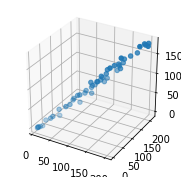

In [14]:
b, g, r = np.split(patch, 3, axis=2)
fig = plt.figure(figsize=(3,3))
ax = plt.axes(projection='3d')
ax.scatter(b, g, r)

## Use PCA to Test for Color-line Presence

In [15]:
scores = list()
pca = PCA(n_components=1)
pad_width = (patch_size - 1) // 2
p_img = np.pad(img, pad_width=pad_width)
p_height = height + pad_width * 2
p_width = width + pad_width * 2

for y in range(p_height - patch_size + 1):
    for x in range(p_width - patch_size + 1):
        patch = p_img[y:y + patch_size, 
                      x:x + patch_size, :]
        patch = np.reshape(patch, (-1, 3))
        pca.fit(patch)
        score = float(pca.explained_variance_ratio_)
        scores.append(score)

scores = np.array(scores)

## Show distribution of PCA score

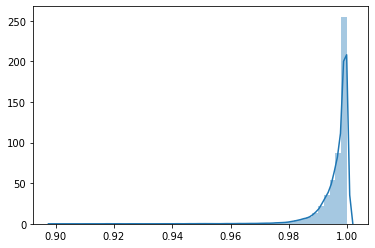

In [16]:
sns.distplot(scores)

## Show Image Parts with Strong Color-lines

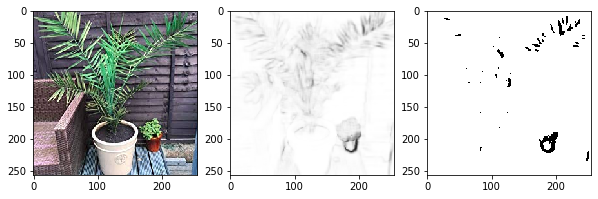

In [11]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

scores_image = np.reshape(scores, (256, 256))
lower_than_98 = ~(scores_image < 0.98)

ax[0].imshow(img, cmap='binary')
ax[1].imshow(scores_image, cmap='binary_r')
ax[2].imshow(lower_than_98, cmap='binary_r')